# Practical Exam: House sales

RealAgents is a real estate company that focuses on selling houses.

RealAgents sells a variety of types of house in one metropolitan area.

Some houses sell slowly and sometimes require lowering the price in order to find a buyer.

In order to stay competitive, RealAgents would like to optimize the listing prices of the houses it is trying to sell.

They want to do this by predicting the sale price of a house given its characteristics.

If they can predict the sale price in advance, they can decrease the time to sale.


## Data

The dataset contains records of previous houses sold in the area.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton'. </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced" (two shared walls), "Semi-detached" (one shared wall), or "Detached" (no shared walls). </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |


# Task 1

The team at RealAgents knows that the city that a property is located in makes a difference to the sale price. 

Unfortuntately they believe that this isn't always recorded in the data. 

Calculate the number of missing values of the `city`. 

 - You should use the data in the file "house_sales.csv". 

 - Your output should be an object `missing_city`, that contains the number of missing values in this column. 

In [38]:
import pandas as pd

# Load the data
file_path = 'house_sales.csv'
df = pd.read_csv(file_path)


In [39]:
# Count the missing values represented by '--' in the 'city' column
missing_city = (df['city'] == '--').sum()

missing_city

73

---

# Task 2 

Before you fit any models, you will need to make sure the data is clean. 

The table below shows what the data should look like. 

Create a cleaned version of the dataframe. 

 - You should start with the data in the file "house_sales.csv". 

 - Your output should be a dataframe named `clean_data`. 

 - All column names and values should match the table below.


| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton' </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced", "Semi-detached", or "Detached". </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |

In [40]:
import pandas as pd

# Load the data
df_2 = pd.read_csv(file_path)

NONIMAL - 'city'

In [41]:
# Replace '--' with 'Unknown' in the 'city' column
df_2['city'].replace('--', 'Unknown', inplace=True)

# Get discrete values in the 'city' column
discrete_values = df_2['city'].value_counts()
print(discrete_values)


Silvertown    517
Teasdale      366
Poppleton     362
Riverford     182
Unknown        73
Name: city, dtype: int64


DSICRETE - 'sale_price'

<AxesSubplot: >

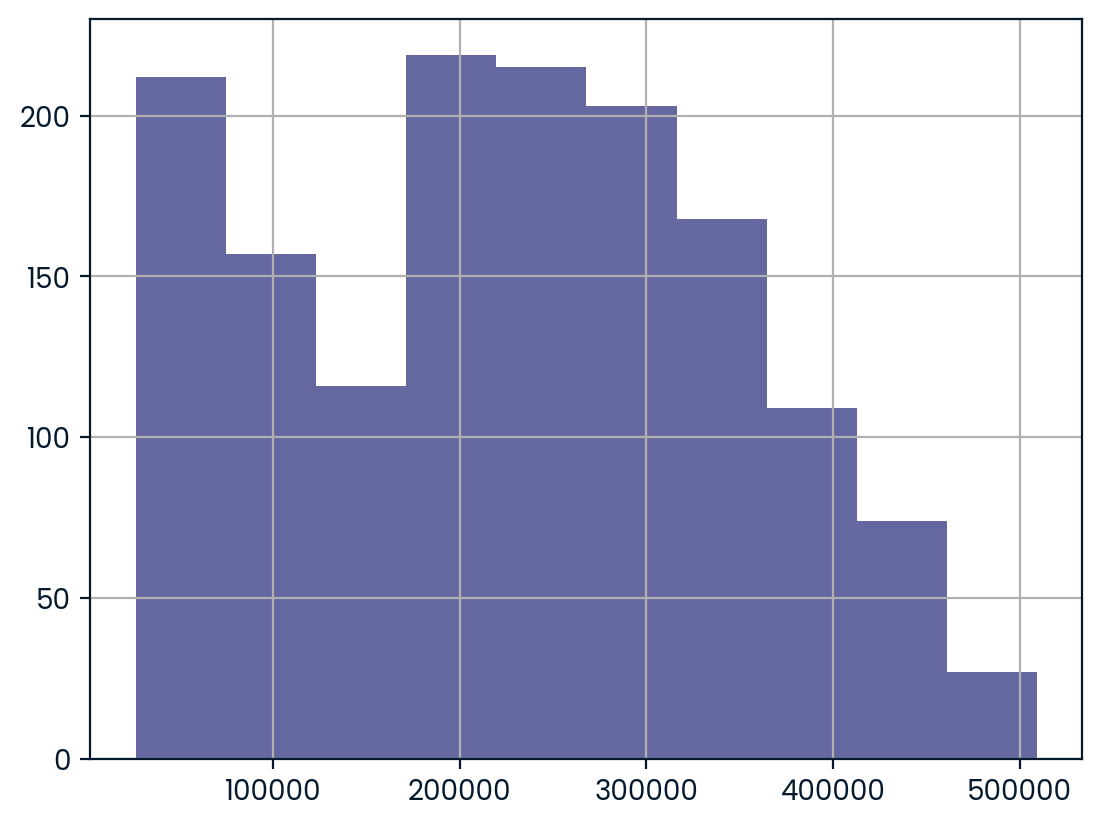

In [42]:
df_2['sale_price'].hist()

DISCRETE - 'sale_date'

In [43]:
# Convert the sale_date column to datetime with the specified format
df_2['sale_date'] = pd.to_datetime(df_2['sale_date'], format='%Y-%m-%d')

# Verify the conversion
df_2['sale_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1500 entries, 0 to 1499
Series name: sale_date
Non-Null Count  Dtype         
--------------  -----         
1500 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.8 KB


CONTINUOS - 'months_listed'

In [44]:
mean_months_listed = df_2['months_listed'].mean().round(1)
df_2['months_listed'].fillna(mean_months_listed, inplace=True)

df_2['months_listed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1500 entries, 0 to 1499
Series name: months_listed
Non-Null Count  Dtype  
--------------  -----  
1500 non-null   float64
dtypes: float64(1)
memory usage: 11.8 KB


DISCRETE - 'bedrooms'

In [45]:
df_2['bedrooms'].describe()

count    1500.000000
mean        4.018000
std         1.413391
min         2.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: bedrooms, dtype: float64

ORDINAL - 'house_type'

In [46]:
# Define a mapping dictionary to unify the house types
mapping = {
    'Detached': 'Detached',
    'Det.': 'Detached',
    'Semi-detached': 'Semi-detached',
    'Semi': 'Semi-detached',
    'Terraced': 'Terraced',
    'Terr.': 'Terraced'
}

# Apply the mapping to the house_type column
df_2['house_type'] = df_2['house_type'].map(mapping)

# Check the result
df_2['house_type'].value_counts()


Detached         1124
Semi-detached     245
Terraced          131
Name: house_type, dtype: int64

CONTINUOS - 'area'

In [47]:
df_2['area'] = df_2['area'].str.replace(' sq.m.', '').astype(float)
mean_area = df_2['area'].mean().round(1)
df_2['area'].fillna(mean_area, inplace=True)
df_2['area'] = df_2['area'].round(1)
df_2['area'].describe()

count    1500.000000
mean      352.123933
std       146.083507
min       100.300000
25%       228.400000
50%       350.700000
75%       478.025000
max       600.000000
Name: area, dtype: float64

RESULT - Final DataFrame 

In [48]:
clean_data = df_2
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   house_id       1500 non-null   int64         
 1   city           1500 non-null   object        
 2   sale_price     1500 non-null   int64         
 3   sale_date      1500 non-null   datetime64[ns]
 4   months_listed  1500 non-null   float64       
 5   bedrooms       1500 non-null   int64         
 6   house_type     1500 non-null   object        
 7   area           1500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 93.9+ KB


In [49]:
clean_data.head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Detached,528.4
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1


---

# Task 3 

The team at RealAgents have told you that they have always believed that the number of bedrooms is the biggest driver of house price. 

Producing a table showing the difference in the average sale price by number of bedrooms along with the variance to investigate this question for the team.

 - You should start with the data in the file 'house_sales.csv'.

 - Your output should be a data frame named `price_by_rooms`. 

 - It should include the three columns `bedrooms`, `avg_price`, `var_price`. 

 - Your answers should be rounded to 1 decimal place.   

In [50]:
import pandas as pd

# Load the data
df_3 = clean_data

In [51]:
#Group by number of bedrooms and calculate average price and variance
grouped = df_3.groupby('bedrooms')['sale_price'].agg(['mean', 'var']).reset_index()

# Rename columns to match the required output
grouped.columns = ['bedrooms', 'avg_price', 'var_price']

# Round the values to 1 decimal place
grouped = grouped.round(1)

price_by_rooms = grouped

price_by_rooms.head()

,bedrooms,avg_price,var_price
0,2,67076.4,5.652896e+08
1,3,154665.1,2.378289e+09
2,4,234704.6,1.725211e+09
3,5,301515.9,2.484328e+09
4,6,375741.3,3.924432e+09


---


# Task 4

Fit a baseline model to predict the sale price of a house.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “validation.csv” to predict new values based on your model. You must return a dataframe named `base_result`, that includes `house_id` and `price`. The price column must be your predicted values.

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the training data
train_data = clean_data

# Preprocess the data (handle missing values, encode categorical variables, etc.)
# For simplicity, let's assume there are no missing values and we need to encode categorical variables
train_data = pd.get_dummies(train_data, columns=['city', 'house_type'], drop_first=True)

# Feature Engineering: Creating new features if applicable
train_data['price_per_sqft'] = train_data['sale_price'] / train_data['area']

# Define the features and target variable
X = train_data.drop(['sale_price', 'sale_date'], axis=1)
y = train_data['sale_price']

# Data Scaling: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets for model validation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a more advanced model (Random Forest Regressor with Grid Search for hyperparameter tuning)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Load the validation data
validation_data = pd.read_csv('validation.csv')

# Preprocess the validation data in the same way as the training data
validation_data = pd.get_dummies(validation_data, columns=['city', 'house_type'], drop_first=True)

# Ensure that the validation data has the same columns as the training data
missing_cols = set(X.columns) - set(validation_data.columns)
for col in missing_cols:
    validation_data[col] = 0
validation_data = validation_data[X.columns]

# Data Scaling: Standardize the validation data
validation_data_scaled = scaler.transform(validation_data)

# Make predictions on the validation data
validation_data['price'] = best_model.predict(validation_data_scaled)

# Prepare the result DataFrame
base_result = validation_data[['house_id', 'price']]

# Display or save the result
print(base_result)



Mean Squared Error: 24570780.37288768
     house_id       price
0     1331375   49764.175
1     1630115  197116.520
2     1645745  254655.465
3     1336775   49674.640
4     1888274  198802.360
..        ...         ...
295   1986255  239553.290
296   1896276  250411.310
297   1758223  175720.540
298   1752010  146036.650
299   1651404  243335.210

[300 rows x 2 columns]


# Task 5

Fit a comparison model to predict the sale price of a house.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “validation.csv” to predict new values based on your model. You must return a dataframe named `compare_result`, that includes `house_id` and `price`. The price column must be your predicted values.

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
train_df = pd.read_csv('train.csv')
validation_df = pd.read_csv('validation.csv')

# Define preprocessing for numeric features (simple imputation)
numeric_features = ['months_listed', 'bedrooms', 'area']
numeric_transformer = SimpleImputer(strategy='median')

# Define preprocessing for categorical features (simple imputation + one-hot encoding)
categorical_features = ['city', 'house_type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Prepare the data
X = train_df.drop(columns=['house_id', 'sale_price', 'sale_date'])
y = train_df['sale_price']

# Split the data into training and testing sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Predict on the validation set
X_val = validation_df.drop(columns=['house_id', 'sale_date'])
validation_df['price'] = model.predict(X_val)

# Prepare the result dataframe
compare_result = validation_df[['house_id', 'price']]


rmse


23465.559923708086